In [5]:
import csv, math
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from dython.nominal import associations

pd.set_option('display.max_rows', 100)
pd.options.mode.chained_assignment = None  

In [2]:
# df: dataframe containing features to be encoded
# columns: list of columns to be encoded
def one_hot_encode(df, columns):
    ohe = OneHotEncoder()
    ohe_features = pd.DataFrame(ohe.fit_transform(df[columns]).toarray())
    ohe_features.columns = ohe.get_feature_names()
    df = pd.concat([df, ohe_features], axis=1)
    df = df.drop(columns = columns)
    return df

# df: dataframe containing features to be encoded
# columns: list of columns to be encoded
def label_encode(df, columns):
    le = LabelEncoder()
    df[columns] = df[columns].apply(le.fit_transform)
    return df

def extract_time_features(df):
    df['month'] = pd.DatetimeIndex(df['timestamp']).month
    df['day'] = pd.DatetimeIndex(df['timestamp']).day
    df['hour'] = pd.DatetimeIndex(df['timestamp']).hour
    df['minute'] = pd.DatetimeIndex(df['timestamp']).minute
    df['second'] = pd.DatetimeIndex(df['timestamp']).second
    df = df.drop(['timestamp'], axis=1)
    return df

In [3]:
f = '../data/Scorecard-109789.csv'

# column headers
cols = ['account','category','provider','device','fragments','geo','predictorScore','hazardScore','averagePIDX',
        'averageBufferEvents','averageBitrateShifts','asn','timestamp','hrtime']

# all features
features = ['hazardScore', 'averagePIDX', 'averageBufferEvents', 'averageBitrateShifts',
        'timestamp', 'provider', 'device', 'asn', 'fragments', 'geo']

# read all data with column names
df = pd.read_csv(f, header=None, names=cols)

# get dataframe with just features
df_features = df[features]

df_features.head(100)

,hazardScore,averagePIDX,averageBufferEvents,averageBitrateShifts,timestamp,provider,device,asn,fragments,geo
0,0.0,0.000000,0.000000,0.000000,1591314692617,akamai,windows_br5_be5,1,209,6254928
1,0.0,0.000000,0.000000,0.000000,1591314692617,akamai,windows_br5_be5,2,27231,6254928
2,0.0,71.287185,0.036364,0.000000,1591314692617,akamai,macos_core,55,701,6254928
3,0.0,0.000000,0.000000,0.000000,1591314692617,akamai,ipados;apple_core_media,5,7018,-1
4,0.0,98.421852,0.030303,0.030303,1591314692617,comcast,windows_br5_be5,33,11426,4597040
5,0.0,0.000000,0.000000,0.000000,1591314692617,level3,windows_br5_be5,3,22709,-1
6,0.0,82.793416,0.000000,0.000000,1591314692617,comcast,windows_br5_be5,11,14434,-1
7,0.0,127.008966,0.000000,0.000000,1591314692617,akamai,windows_br5_be5,14,701,4138106
8,0.0,69.444966,0.000000,0.000000,1591314692617,level3,windows;trontv,19,-1,-1
9,1.0,71.630897,0.055556,0.000000,1591314692617,comcast,windows_br10_be5,18,15129,4896861


In [4]:
# convert fragments to numeric
df_features['fragments'] = df_features['fragments'].apply(lambda x: int(x) if x != '_' else -1)

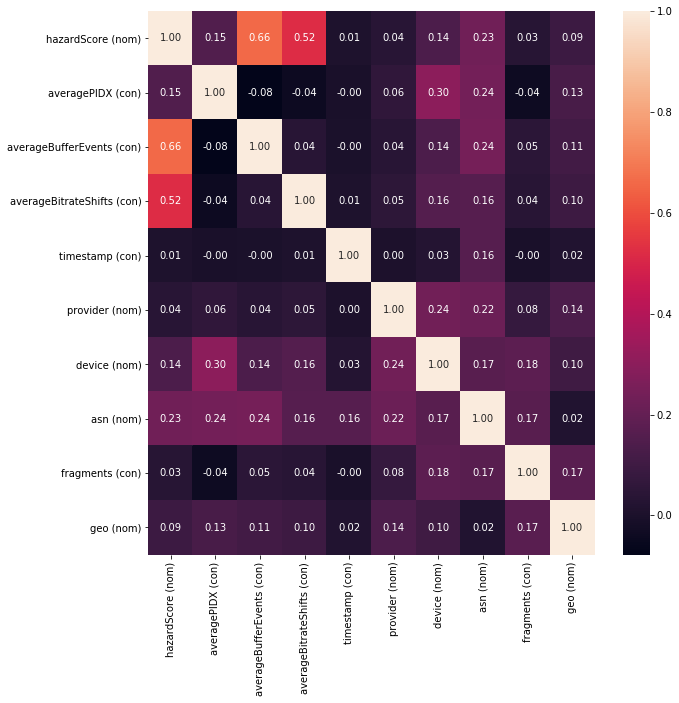

In [6]:
heatmap = associations(df_features,nominal_columns=['hazardScore','provider','device','asn','geo'],mark_columns=True,theil_u=False,plot=True,figsize=(10,10))

In [113]:
# convert timestamp to datetime and extract time features
df_features['timestamp'] = pd.to_datetime(df_features['timestamp'], unit='ms')
df_features = extract_time_features(df_features)

# one hot encode categorical features
cat_features = ['provider', 'device', 'geo']
df_encoded = one_hot_encode(df_features, cat_features)

df_encoded.head()

,hazardScore,averagePIDX,averageBufferEvents,averageBitrateShifts,asn,fragments,month,day,hour,minute,...,x2_5744337,x2_5769223,x2_5815135,x2_5843591,x2_5855797,x2_5879092,x2_6254925,x2_6254926,x2_6254927,x2_6254928
0,0.0,0.000000,0.000000,0.000000,1,209,6,4,23,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.000000,0.000000,0.000000,2,27231,6,4,23,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,71.287185,0.036364,0.000000,55,701,6,4,23,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000000,0.000000,0.000000,5,7018,6,4,23,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,98.421852,0.030303,0.030303,33,11426,6,4,23,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
stride = 1
sequence_len = 20
num_features = len(df_encoded.columns)
num_samples = math.ceil((df.shape[0]-sequence_len)/stride + 1) - 1

# construct input layer data
data = np.zeros((num_samples, sequence_len, num_features))
labels = df.hazardScore[sequence_len::stride].to_numpy()

In [130]:
num_records = df_encoded.shape[0]
for sample_i in range(num_samples):
    df_slice = df_encoded[sample_i:sample_i+sequence_len].reset_index(drop=True)
    for timestep_i, features in df_slice.iterrows():
        data[sample_i, timestep_i] = features

In [131]:
np.save('../data/sequence_data.npy', data)
np.save('../data/sequence_labels.npy', labels)

In [133]:
features_path = '../data/sequence_data.npy'
labels_path = '../data/sequence_labels.npy'

# load data from .npy files into numpy arrays
X = np.load(features_path)
y = np.load(labels_path)

In [135]:
features_path = '../data/sequence_data.npy'
labels_path = '../data/sequence_labels.npy'

# load data from .npy files into numpy arrays
X = np.load(features_path)
y = np.load(labels_path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)